In [123]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [125]:
image_size = 256
channels = 3 #rgb

In [127]:
train_datagenerator = ImageDataGenerator(
    rescale = 1./255,       # 0-255  -->  0-1
    horizontal_flip = True,
    rotation_range = 10,
)
train_datasplit = train_datagenerator.flow_from_directory(      # pip install split-folders   train test val icin  bu fonksdaki subset = sadece train ve val için test yok
    "dataset/train",
    target_size=(image_size,image_size),
    class_mode="sparse",   # etiketler integer formatında tomato_healthy -> 0 , tomato_blight -> 1 , tomato_spot ->2 ...
    batch_size=32,
    #save_to_dir ="C:\Users\Yunus\imagedatagenerator\augmentedimages"    oluşan görüntüleri görmek icin 32,32 olusturmaya devam eder
)

Found 11203 images belonging to 10 classes.


In [128]:
for image_batch,image_label in train_datasplit:
    print(image_batch[0].shape)
    print(image_batch[0])
    break

(256, 256, 3)
[[[0.34615886 0.28733534 0.36184514]
  [0.36718208 0.30835855 0.38286835]
  [0.39248407 0.33366054 0.40817037]
  ...
  [0.429331   0.37835062 0.45678198]
  [0.432259   0.3812786  0.45970997]
  [0.43518695 0.38420653 0.46263793]]

 [[0.34835482 0.2895313  0.3640411 ]
  [0.3658645  0.30704096 0.38155076]
  [0.39160568 0.33278215 0.40729195]
  ...
  [0.46222106 0.41124067 0.48967203]
  [0.46295306 0.41197267 0.49040404]
  [0.46368504 0.41270465 0.491136  ]]

 [[0.3505508  0.29172727 0.36623707]
  [0.36454692 0.30572337 0.3802332 ]
  [0.3907273  0.3319038  0.40641358]
  ...
  [0.4787855  0.42780513 0.5062365 ]
  [0.47937113 0.42839074 0.5068221 ]
  [0.47995672 0.42897633 0.5074077 ]]

 ...

 [[0.5284302  0.4696067  0.55195963]
  [0.53106534 0.47224185 0.55459476]
  [0.5337005  0.474877   0.55722994]
  ...
  [0.6278051  0.592511   0.66702086]
  [0.61301893 0.5777248  0.6522346 ]
  [0.6030352  0.5677411  0.6422509 ]]

 [[0.5816757  0.5228522  0.6052051 ]
  [0.58006537 0.5212418

In [129]:
train_datasplit.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [131]:
train_datasplit.class_indices.keys()

dict_keys(['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'])

In [132]:
class_names=list(train_datasplit.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [133]:
test_datagenerator = ImageDataGenerator (
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)
test_datasplit = test_datagenerator.flow_from_directory (
    "dataset/test",
    target_size = (image_size,image_size),
    class_mode="sparse",
    batch_size = 32
)

Found 3211 images belonging to 10 classes.


In [138]:
val_datagenerator = ImageDataGenerator (
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range=10
)
val_datasplit = val_datagenerator.flow_from_directory(
    "dataset/val",
    batch_size = 32,
    target_size = (image_size,image_size),
    class_mode = "sparse"
)

Found 1597 images belonging to 10 classes.


In [140]:
input_shape = (image_size, image_size, channels)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [143]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ["accuracy"]
)

In [155]:
history = model.fit(
        train_datasplit,
        steps_per_epoch = 350, # 11203 train images / 32(batch)
        validation_data = val_datasplit,
        validation_steps = 49,   # 1597 validation images / 32(batch)
        verbose=1, # cıktıları göstersin
        epochs = 8
)

Epoch 1/8
350/350 ━━━━━━━━━━━━━━━━━━━━ 744s 2s/step - accuracy: 0.8500 - loss: 0.4324 - val_accuracy: 0.8801 - val_loss: 0.3524
Epoch 2/8
350/350 ━━━━━━━━━━━━━━━━━━━━ 46s 126ms/step - accuracy: 0.9062 - loss: 0.2636 - val_accuracy: 0.8744 - val_loss: 0.3693
Epoch 3/8
350/350 ━━━━━━━━━━━━━━━━━━━━ 679s 2s/step - accuracy: 0.8786 - loss: 0.3453 - val_accuracy: 0.8948 - val_loss: 0.3274
Epoch 4/8
350/350 ━━━━━━━━━━━━━━━━━━━━ 46s 126ms/step - accuracy: 0.8750 - loss: 0.3415 - val_accuracy: 0.8935 - val_loss: 0.3250
Epoch 5/8
350/350 ━━━━━━━━━━━━━━━━━━━━ 716s 2s/step - accuracy: 0.8959 - loss: 0.3023 - val_accuracy: 0.9114 - val_loss: 0.2707
Epoch 6/8
350/350 ━━━━━━━━━━━━━━━━━━━━ 44s 122ms/step - accuracy: 0.8750 - loss: 0.4844 - val_accuracy: 0.9011 - val_loss: 0.2837
Epoch 7/8
350/350 ━━━━━━━━━━━━━━━━━━━━ 696s 2s/step - accuracy: 0.9051 - loss: 0.2720 - val_accuracy: 0.9062 - val_loss: 0.2843
Epoch 8/8
350/350 ━━━━━━━━━━━━━━━━━━━━ 46s 129ms/step - accuracy: 0.9688 - loss: 0.1654 - val_accu

In [225]:
scores = model.evaluate(test_datasplit)
scores

101/101 ━━━━━━━━━━━━━━━━━━━━ 89s 885ms/step - accuracy: 0.9052 - loss: 0.2902


[0.34662216901779175, 0.9047026038169861]

In [237]:
acc= history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss= history.history["loss"]
val_loss=history.history["val_loss"]

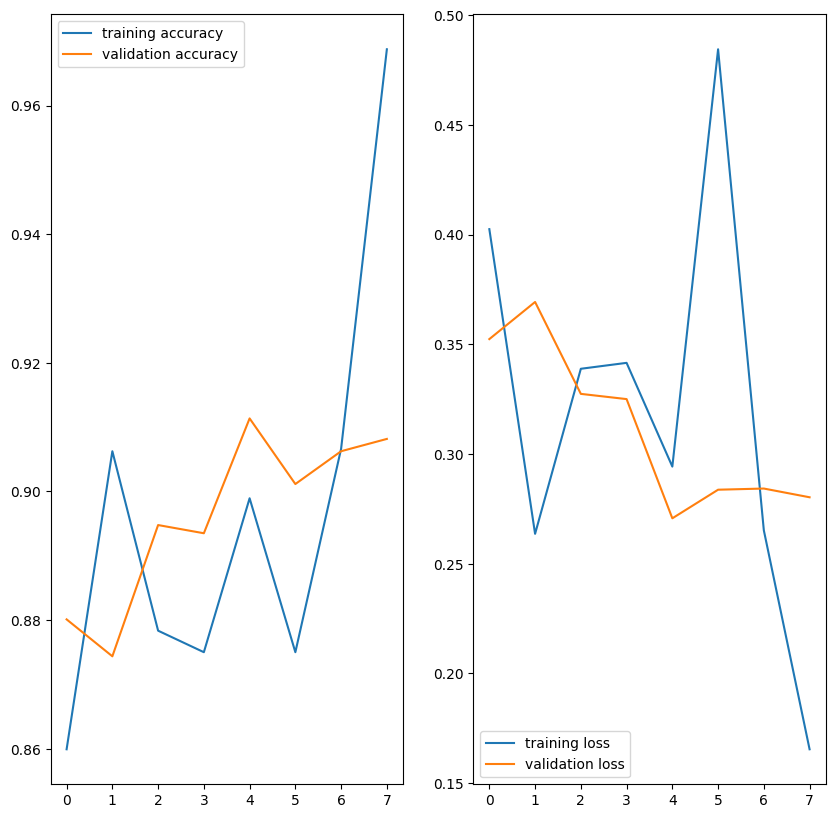

In [239]:
epochs=8
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label="training accuracy")
plt.plot(range(epochs),val_acc,label="validation accuracy")
plt.legend(loc="upper left")

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label="training loss")
plt.plot(range(epochs),val_loss,label="validation loss")
plt.legend(loc="lower left")

time for prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


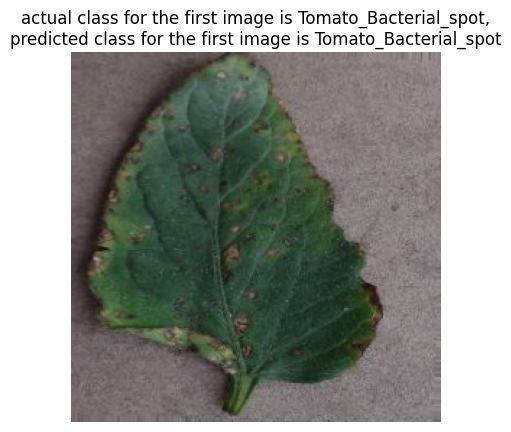

In [241]:
import numpy as np
for image_batch,image_label in test_datasplit:
    first_image=image_batch[0]
    first_label=int(image_label[0])

    print("time for prediction")
    plt.imshow(first_image)
    actual_class = class_names[first_label]
   
    prediction=model.predict(image_batch)
    predicted_class=class_names[np.argmax(prediction[0])]
    
    plt.title(f"actual class for the first image is {actual_class},\npredicted class for the first image is {predicted_class}")
    plt.axis("off")
    break

In [255]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


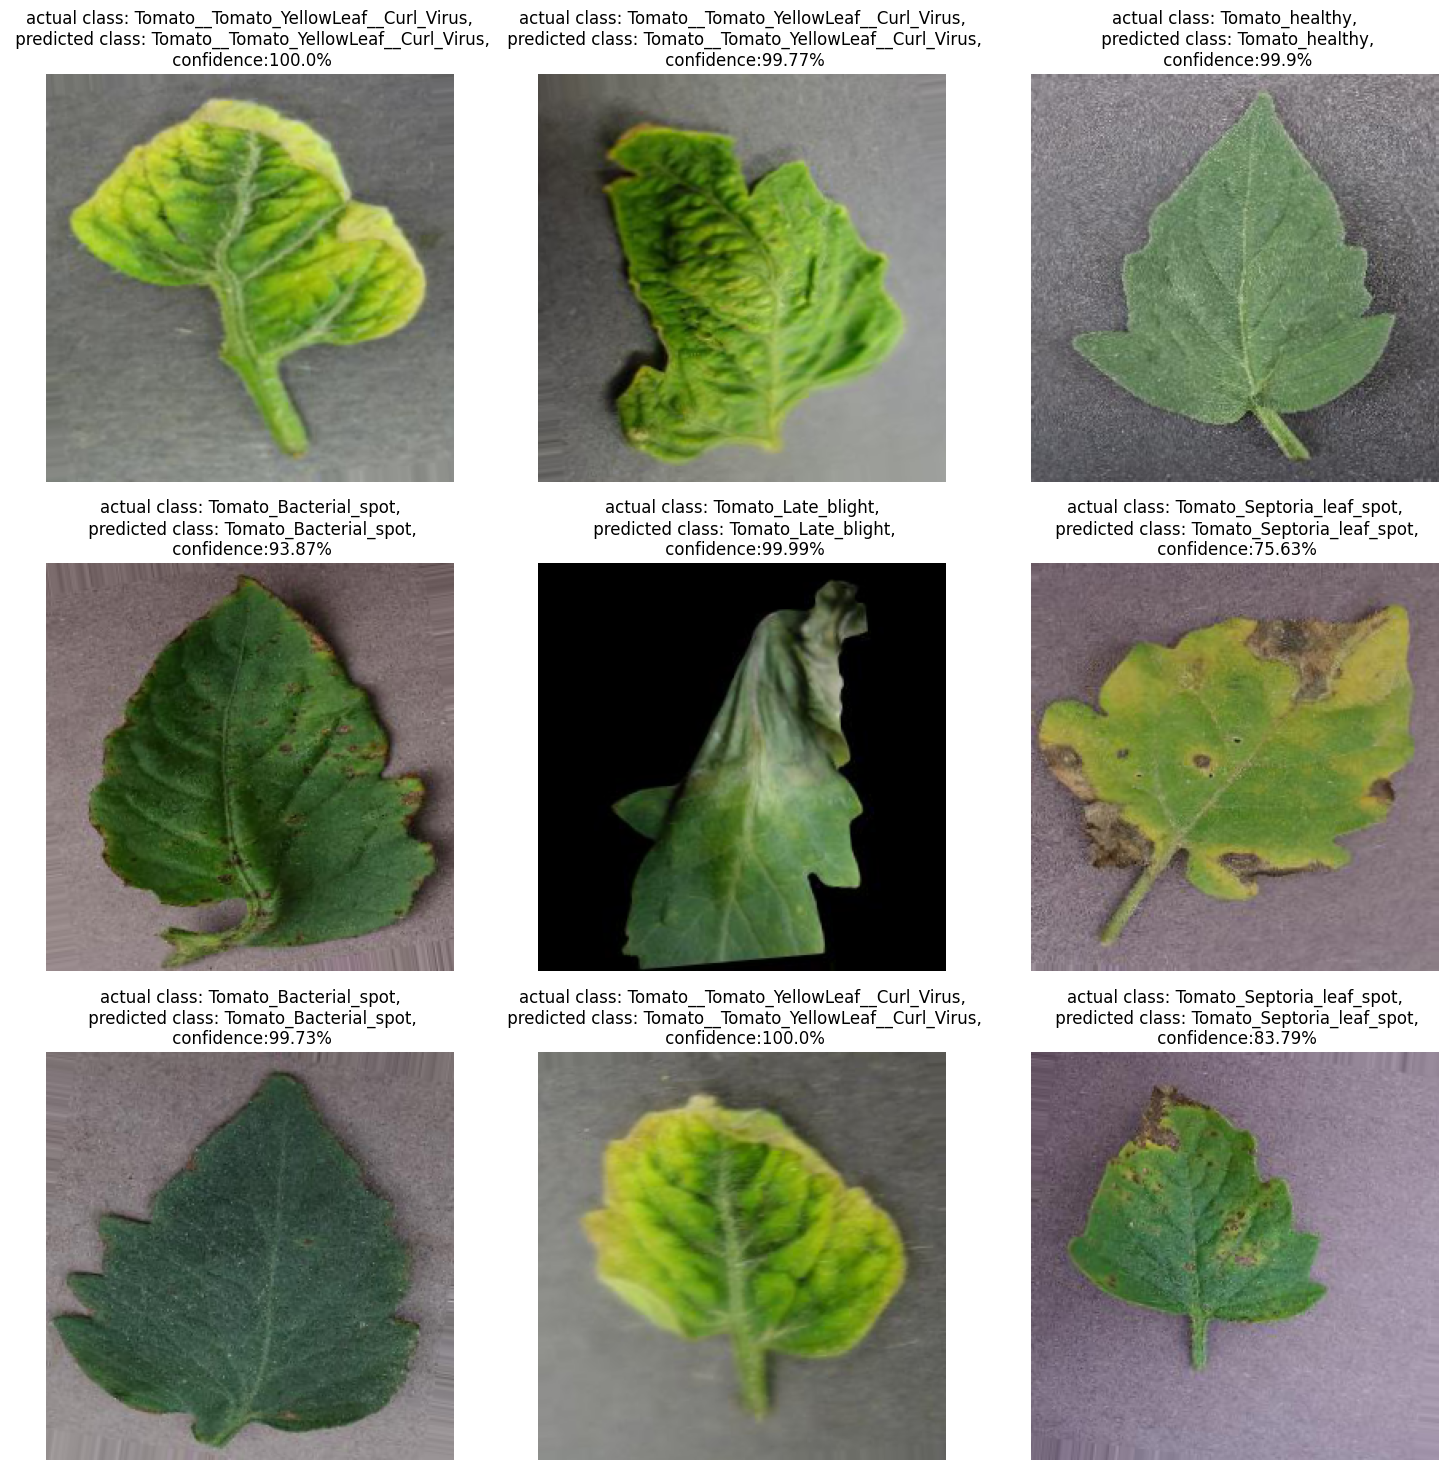

In [263]:
plt.figure(figsize=(18,18))
for images,image_label in test_datasplit:
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        
        predicted_class,confidence=predict(model,images[i])
        actual_class=class_names[int(image_label[i])]
        
        plt.title(f"actual class: {actual_class},\n predicted class: {predicted_class},\n confidence:{confidence}%")
        plt.axis("off")
    break

In [267]:
model.save("ilovetomato.h5")